## Bankruptcy Prediction

### 1. EDA Task


Importing necessary packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC  # Corrected from SVM to SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

#### 1.1 Load the dataset

In [67]:
dfBk = pd.read_excel('Bankruptcy_data.xlsx')

In [68]:
dfBk.shape

(92872, 13)

In [69]:
dfBk.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [70]:
dfBk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [71]:
dfBk.describe().T

,count,mean,std,min,25%,50%,75%,max
EPS,92867.0,-14.461355,2195.467288,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92625.0,-2.631237,121.610921,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92625.0,-29.537274,677.230667,-7.968200e+04,-0.640000,0.070000,0.310000,140.58
Productivity,92625.0,-1.222870,35.885556,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92846.0,1.345316,253.038093,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92625.0,1.053613,2.115945,-3.159000e+01,0.390000,0.830000,1.390000,276.38
Operational Margin,87315.0,-7.915485,214.460079,-3.017570e+04,-0.030000,0.060000,0.140000,394.47
Return on Equity,92864.0,-2.112382,352.596902,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00
Market Book Ratio,92815.0,358.506265,26063.637981,-3.151500e+06,11.200000,58.280000,240.140000,3455419.33
Assets Growth,86171.0,1.294075,73.769522,-1.000000e+00,-0.052596,0.051844,0.192062,14231.00


#### 1.2 Checking for Null Values

In [72]:
dfBk.isna().sum()

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [73]:
def top_missing_cols(df,n=10,thresh=80):

    # returns missing columns in dataframe with missing values percent > thresh
    # if n=None. It will gave whole dataframe with missing values percent > thresh
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['Columns','MissingPercent']
    dff = dff.sort_values(by=['MissingPercent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["MissingPercent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n)
    else:
        return dff

In [74]:
top_missing_cols(dfBk, thresh=10)

There are 12 columns in this dataset with missing values.
There are 0 columns with missing percent values than 10%


,Columns,MissingPercent
0,Employee Growth,7.548023
1,Assets Growth,7.215307
2,Sales Growth,7.215307
3,Operational Margin,5.983504
4,Liquidity,0.265957
5,Profitability,0.265957
6,Productivity,0.265957
7,Asset Turnover,0.265957
8,Market Book Ratio,0.061375
9,Leverage Ratio,0.027996


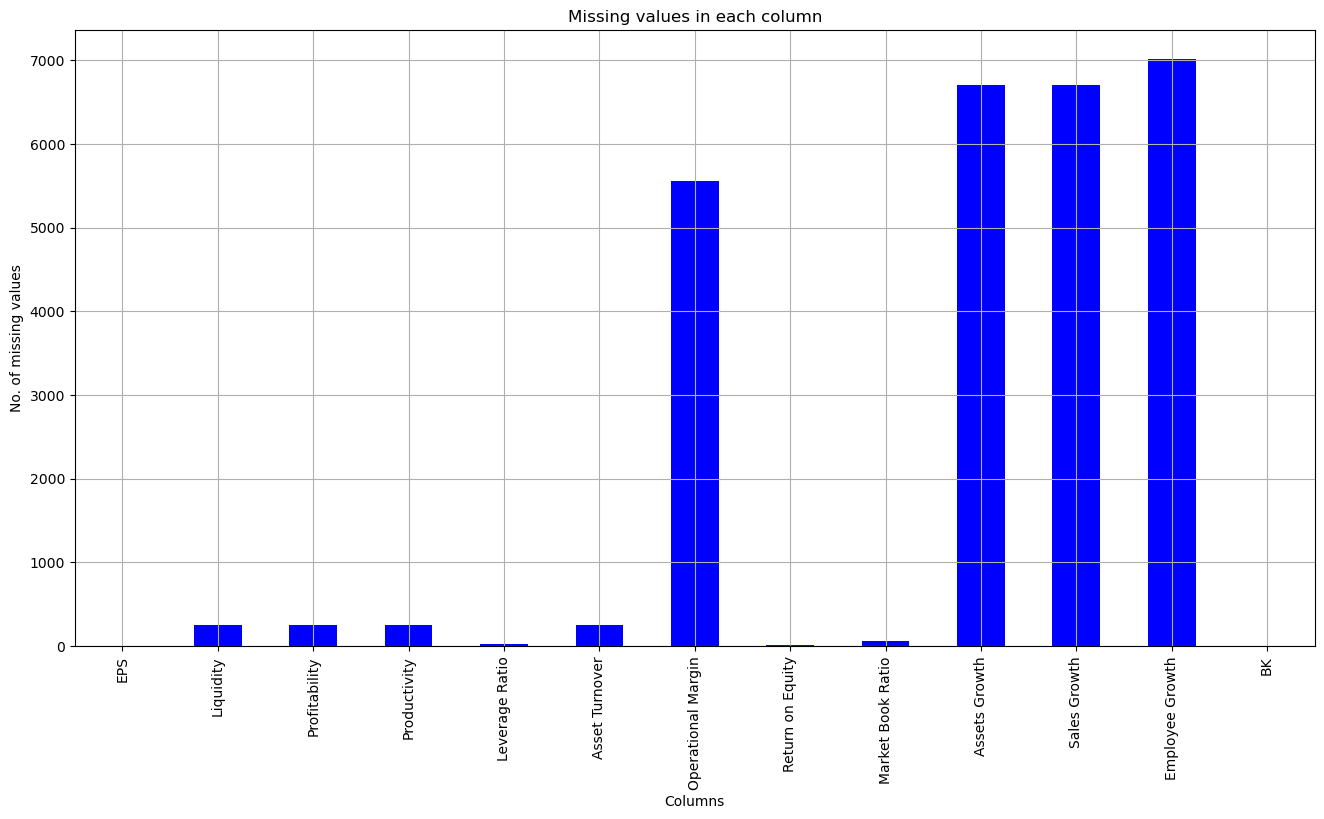

In [75]:
missingValues = dfBk.isna().sum()

plt.figure(figsize=(16,8))
missingValues.plot(kind='bar', color='blue')
plt.title('Missing values in each column')
plt.xlabel('Columns')
plt.ylabel('No. of missing values')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [76]:
# dfBk = dfBk.dropna()

#### 1.3 Checking for Imbalance Target Values

In [77]:
bkCounts = dfBk['BK'].value_counts()
print(bkCounts)

BK
0    92314
1      558
Name: count, dtype: int64


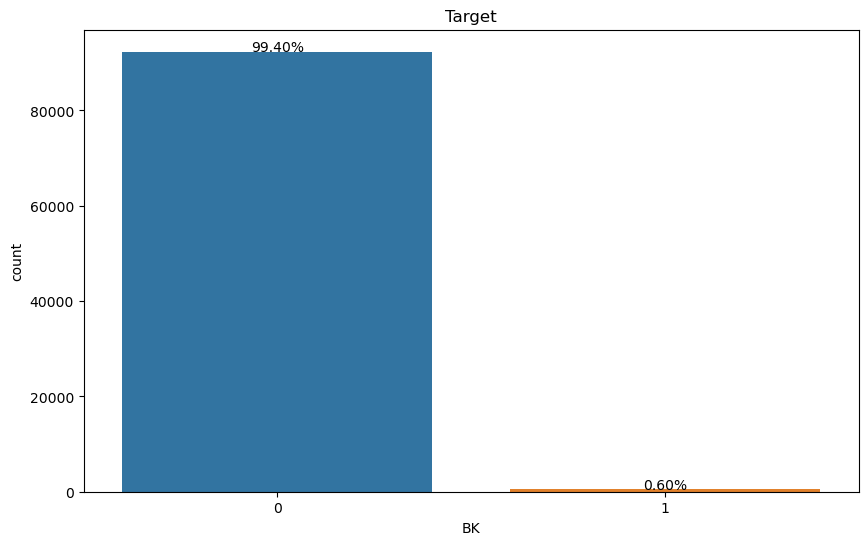

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.countplot(x='BK', data=dfBk, ax=axes)
axes.set_title('Target')

total = float(len(dfBk['BK']))  # Tổng số lượng mẫu

for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x() + p.get_width()/2.,
              height + 3,
              '{:1.2f}%'.format(height * 100 / total),
              ha="center")

plt.show() 

In [79]:
filteredDf = dfBk[dfBk.isnull().any(axis=1) & (dfBk['BK'] == 1)]

In [80]:
filteredDf

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
88695,-2.254152,-0.993304,-0.793827,-0.065276,-2.289112,1.261267,-0.051754,-1.001845,-9.379761,-0.244765,-0.225872,NaN,1
88736,-0.017145,0.975717,-5.698675,-0.091611,0.000000,0.000000,NaN,-0.048987,8.617942,-0.153271,0.000000,0.000000,1
88747,-0.607550,-6.399343,-20.377157,-3.768283,-0.747523,2.437962,-1.545669,-3.894549,NaN,-0.874871,-0.573278,-0.955882,1
88774,-0.411383,0.037509,-3.788447,-0.821241,-1.271280,1.150627,-0.713734,-0.143090,-73.836213,-0.184460,-0.399558,NaN,1
88798,-3.653888,-0.318630,-1.507494,-0.798539,-43.944956,0.173290,-4.608113,-4.175872,NaN,-0.242440,-0.785835,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92693,0.013185,0.125143,-1.530914,0.053813,0.498599,1.431990,0.037579,0.164817,11.532664,0.128132,0.107206,NaN,1
92733,-0.402621,-1.115373,-4.215341,-1.253379,-1.984741,1.681861,-0.745234,-6.710348,-3.523469,-0.687217,-0.512440,NaN,1
92783,-0.033713,-1.646449,-10.187550,-0.855547,-1.273790,0.759777,-1.126050,-0.177438,-138.388768,-0.317166,-0.345704,NaN,1
92799,-26.000004,-0.059992,-2.247404,-0.173649,-0.493578,0.624751,-0.277950,-2363.636772,NaN,-0.557942,-0.308372,NaN,1


In [81]:
filteredDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 88695 to 92855
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 81 non-null     float64
 1   Liquidity           85 non-null     float64
 2   Profitability       85 non-null     float64
 3   Productivity        85 non-null     float64
 4   Leverage Ratio      84 non-null     float64
 5   Asset Turnover      85 non-null     float64
 6   Operational Margin  68 non-null     float64
 7   Return on Equity    81 non-null     float64
 8   Market Book Ratio   76 non-null     float64
 9   Assets Growth       85 non-null     float64
 10  Sales Growth        85 non-null     float64
 11  Employee Growth     13 non-null     float64
 12  BK                  85 non-null     int64  
dtypes: float64(12), int64(1)
memory usage: 9.3 KB


In [82]:
top_missing_cols(filteredDf, thresh=90)

There are 6 columns in this dataset with missing values.
There are 0 columns with missing percent values than 90%


,Columns,MissingPercent
0,Employee Growth,84.705882
1,Operational Margin,20.000000
2,Market Book Ratio,10.588235
3,EPS,4.705882
4,Return on Equity,4.705882
5,Leverage Ratio,1.176471
6,Liquidity,0.000000
7,Profitability,0.000000
8,Productivity,0.000000
9,Asset Turnover,0.000000


#### 1.4 Handling Null Values

In [83]:
dfBk.dropna(subset=['Liquidity'], inplace=True)

In [84]:
dfBk.dropna(subset=['Assets Growth'],inplace=True)

In [85]:
dfBk.isna().sum()

EPS                      5
Liquidity                0
Profitability            0
Productivity             0
Leverage Ratio           9
Asset Turnover           0
Operational Margin    4463
Return on Equity         8
Market Book Ratio       30
Assets Growth            0
Sales Growth             0
Employee Growth        308
BK                       0
dtype: int64

In [86]:
filteredDf1 = dfBk[dfBk.isnull().any(axis=1) & (dfBk['BK'] == 1)]

In [87]:
filteredDf1

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
88695,-2.254152,-0.993304,-0.793827,-0.065276,-2.289112,1.261267,-0.051754,-1.001845,-9.379761,-0.244765,-0.225872,NaN,1
88736,-0.017145,0.975717,-5.698675,-0.091611,0.000000,0.000000,NaN,-0.048987,8.617942,-0.153271,0.000000,0.000000,1
88747,-0.607550,-6.399343,-20.377157,-3.768283,-0.747523,2.437962,-1.545669,-3.894549,NaN,-0.874871,-0.573278,-0.955882,1
88774,-0.411383,0.037509,-3.788447,-0.821241,-1.271280,1.150627,-0.713734,-0.143090,-73.836213,-0.184460,-0.399558,NaN,1
88798,-3.653888,-0.318630,-1.507494,-0.798539,-43.944956,0.173290,-4.608113,-4.175872,NaN,-0.242440,-0.785835,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92693,0.013185,0.125143,-1.530914,0.053813,0.498599,1.431990,0.037579,0.164817,11.532664,0.128132,0.107206,NaN,1
92733,-0.402621,-1.115373,-4.215341,-1.253379,-1.984741,1.681861,-0.745234,-6.710348,-3.523469,-0.687217,-0.512440,NaN,1
92783,-0.033713,-1.646449,-10.187550,-0.855547,-1.273790,0.759777,-1.126050,-0.177438,-138.388768,-0.317166,-0.345704,NaN,1
92799,-26.000004,-0.059992,-2.247404,-0.173649,-0.493578,0.624751,-0.277950,-2363.636772,NaN,-0.557942,-0.308372,NaN,1


In [88]:
top_missing_cols(filteredDf1, thresh=90)

There are 6 columns in this dataset with missing values.
There are 0 columns with missing percent values than 90%


,Columns,MissingPercent
0,Employee Growth,84.705882
1,Operational Margin,20.000000
2,Market Book Ratio,10.588235
3,EPS,4.705882
4,Return on Equity,4.705882
5,Leverage Ratio,1.176471
6,Liquidity,0.000000
7,Profitability,0.000000
8,Productivity,0.000000
9,Asset Turnover,0.000000


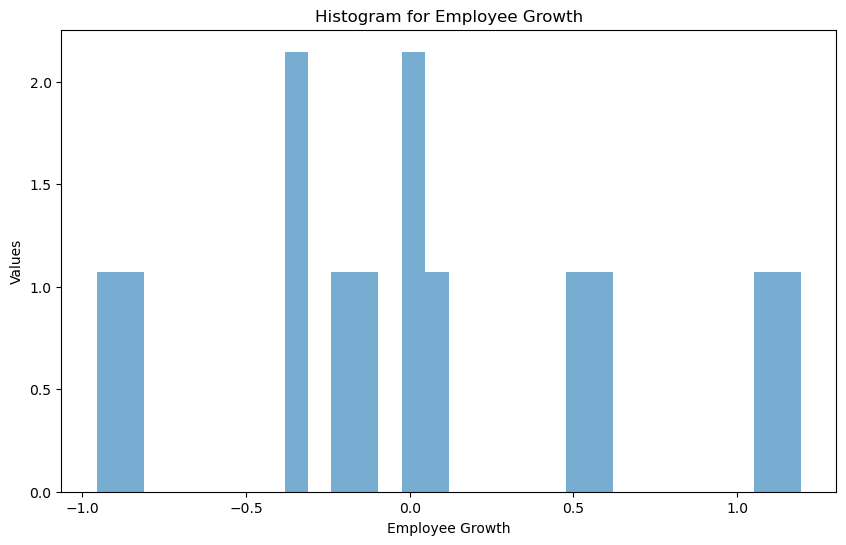

In [158]:
plt.figure(figsize=(10, 6))
plt.hist(filteredDf1['Employee Growth'], bins=30, density=True, alpha=0.6)
plt.title('Histogram for Employee Growth')
plt.xlabel('Employee Growth')
plt.ylabel('Values')
plt.show()

In [90]:
filteredDf1.shape

(85, 13)

In [91]:
dfBk.isna().sum()

EPS                      5
Liquidity                0
Profitability            0
Productivity             0
Leverage Ratio           9
Asset Turnover           0
Operational Margin    4463
Return on Equity         8
Market Book Ratio       30
Assets Growth            0
Sales Growth             0
Employee Growth        308
BK                       0
dtype: int64

In [92]:
dfBk.shape

(85977, 13)

In [93]:
dfBk['Operational Margin'] = dfBk['Operational Margin'].fillna(dfBk['Operational Margin'].median())

In [94]:
dfBk['EPS'] = dfBk['EPS'].fillna(dfBk['EPS'].median())

In [95]:
dfBk['Leverage Ratio'] = dfBk['Leverage Ratio'].fillna(dfBk['Leverage Ratio'].median())

In [96]:
dfBk['Market Book Ratio'] = dfBk['Market Book Ratio'].fillna(dfBk['Market Book Ratio'].median())

In [97]:
dfBk['Return on Equity'] = dfBk['Return on Equity'].fillna(dfBk['Return on Equity'].median())

In [98]:
dfBk['Employee Growth'] = dfBk['Employee Growth'].fillna(dfBk['Employee Growth'].mean())

In [99]:
dfBk.isna().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

#### 1.5 Handling Duplicated Values

In [100]:
dfBk.duplicated().sum()

19

In [101]:
dfBk[dfBk.duplicated()]

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
35566,4.57,0.04,0.18,0.12,0.79,0.51,0.24,0.09,22.82,0.020838,-0.033425,0.026115,0
35567,4.44,0.02,0.19,0.11,0.82,0.48,0.23,0.10,19.14,0.014645,-0.034895,0.008614,0
51482,2.67,-0.07,0.10,0.11,0.90,0.76,0.14,0.10,12.19,-0.060779,-0.268154,-0.344557,0
51483,3.16,-0.04,0.11,0.10,0.77,0.71,0.14,0.12,11.92,0.018161,-0.053691,1.315766,0
51484,3.37,-0.07,0.12,0.10,0.76,0.70,0.14,0.11,13.55,0.041565,0.033445,-0.010136,0
51485,3.66,-0.01,0.13,0.08,0.78,0.49,0.16,0.10,16.70,0.069080,-0.253067,-0.199961,0
51486,0.95,-0.05,0.07,0.06,2.07,0.42,0.13,0.06,29.37,0.540813,0.336263,-0.001932,0
51487,0.99,-0.05,0.07,0.09,1.33,0.70,0.13,0.05,43.74,-0.010286,0.639663,-0.077668,0
61231,4.44,0.04,0.22,0.12,0.66,0.63,0.19,0.09,19.18,-0.018581,-0.072410,0.006036,0
61232,2.27,0.06,0.23,0.12,0.65,0.61,0.20,0.11,31.20,0.019072,-0.019947,-0.002000,0


In [102]:
dfBk.drop_duplicates(inplace=True)

In [103]:
dfBk['BK'].value_counts()

BK
0    85400
1      558
Name: count, dtype: int64

#### 1.6 Checking for Outliers

<Axes: >

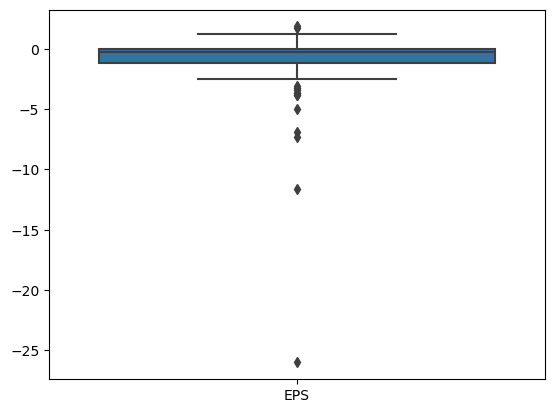

In [104]:
sns.boxplot(data=filteredDf1[['EPS']])

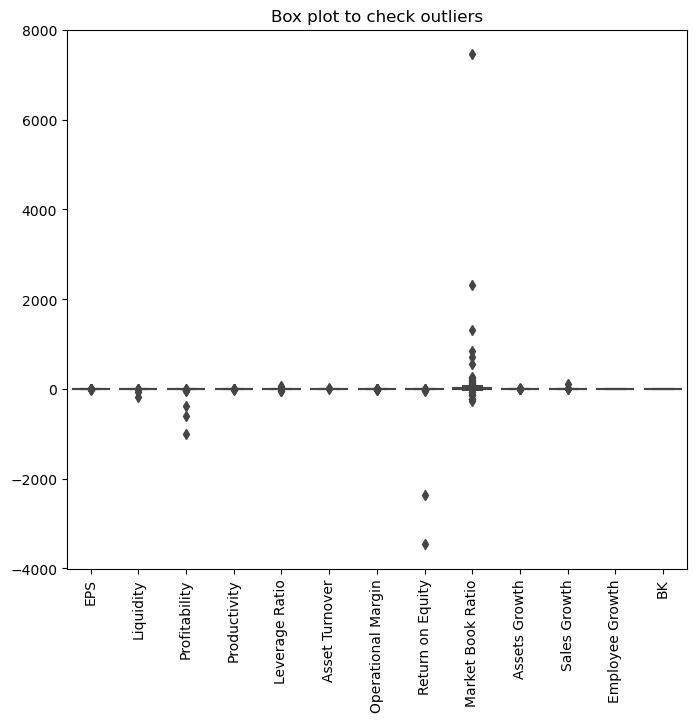

In [105]:
plt.figure(figsize=(8,7))
sns.boxplot(data=filteredDf1)
plt.xticks(rotation=90)
plt.title('Box plot to check outliers')
plt.show()

In [106]:
# Function to calculate outliers using IQR method
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].count()

# Count outliers for each column using the IQR method
outliers_counts = dfBk.drop(columns='BK').apply(count_outliers_iqr)

# Print the number of outliers for each column
for column, count in outliers_counts.items():
    print(f"Number of outliers in column '{column}': {count}")

Number of outliers in column 'EPS': 7488
Number of outliers in column 'Liquidity': 4255
Number of outliers in column 'Profitability': 13321
Number of outliers in column 'Productivity': 12244
Number of outliers in column 'Leverage Ratio': 9570
Number of outliers in column 'Asset Turnover': 3486
Number of outliers in column 'Operational Margin': 15892
Number of outliers in column 'Return on Equity': 12211
Number of outliers in column 'Market Book Ratio': 14599
Number of outliers in column 'Assets Growth': 11883
Number of outliers in column 'Sales Growth': 12359
Number of outliers in column 'Employee Growth': 12384


In [107]:
def removeOutlier(columnName):
    Q1= dfBk[columnName].quantile(0.25)
    Q3= dfBk[columnName].quantile(0.75)
    IQR= Q3-Q1
    nonOutlier = dfBk[~((dfBk[columnName]>(Q3+5*IQR)) | (dfBk[columnName]<(Q1-5*IQR)))]
    return nonOutlier

It's not a good option to remove the outliers because it removes all the 1 [Bankrupt Values] form the target variables.
The reason why it might be happening is maybe because due to the extreme conditions of the person/company they have gone bankrupt so it's not a good option to remove them.

#### 1.7 Train Test Split

In [108]:
dfBk.columns

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'],
      dtype='object')

In [109]:
X_features = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']
y_features = ['BK']

In [110]:
#for i in X_features:
#    dfBk = removeOutlier(i)

In [111]:
# Function to calculate outliers using IQR method
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].count()

# Count outliers for each column using the IQR method
outliers_counts = dfBk.drop(columns='BK').apply(count_outliers_iqr)

# Print the number of outliers for each column
for column, count in outliers_counts.items():
    print(f"Number of outliers in column '{column}': {count}")

Number of outliers in column 'EPS': 7488
Number of outliers in column 'Liquidity': 4255
Number of outliers in column 'Profitability': 13321
Number of outliers in column 'Productivity': 12244
Number of outliers in column 'Leverage Ratio': 9570
Number of outliers in column 'Asset Turnover': 3486
Number of outliers in column 'Operational Margin': 15892
Number of outliers in column 'Return on Equity': 12211
Number of outliers in column 'Market Book Ratio': 14599
Number of outliers in column 'Assets Growth': 11883
Number of outliers in column 'Sales Growth': 12359
Number of outliers in column 'Employee Growth': 12384


In [112]:
dfBk['BK'].value_counts()

BK
0    85400
1      558
Name: count, dtype: int64

In [113]:
#dfBk.drop(dfBk[(dfBk['Return on Equity']< -1500) | (dfBk['Return on Equity']> 10000)].index,inplace=True)

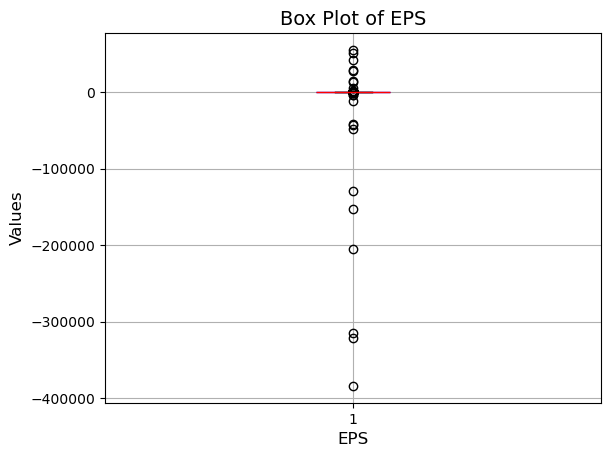

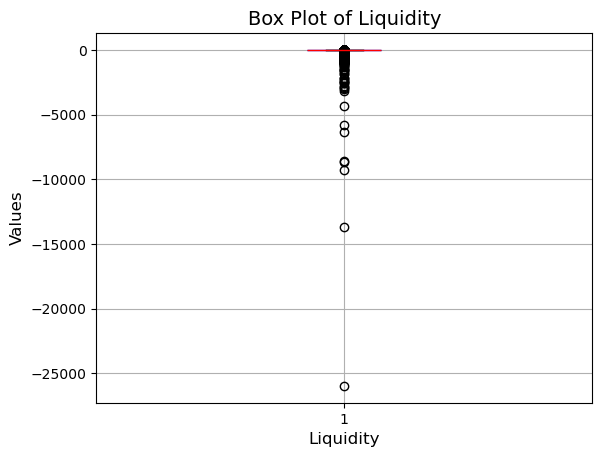

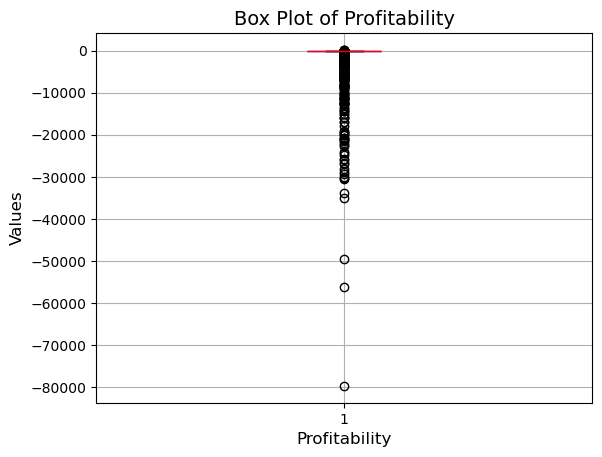

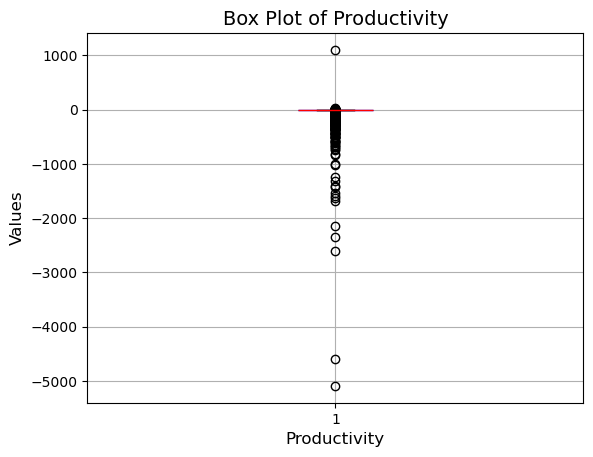

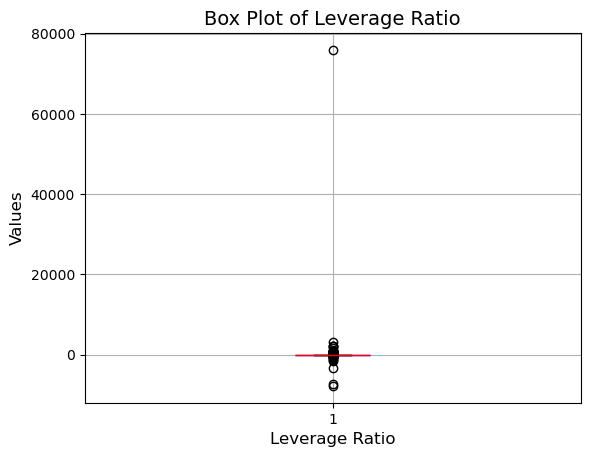

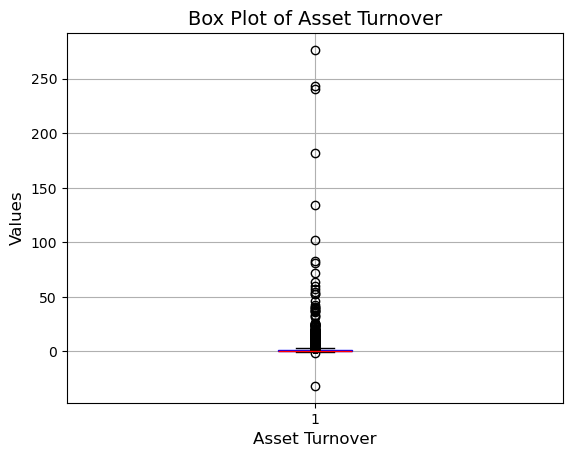

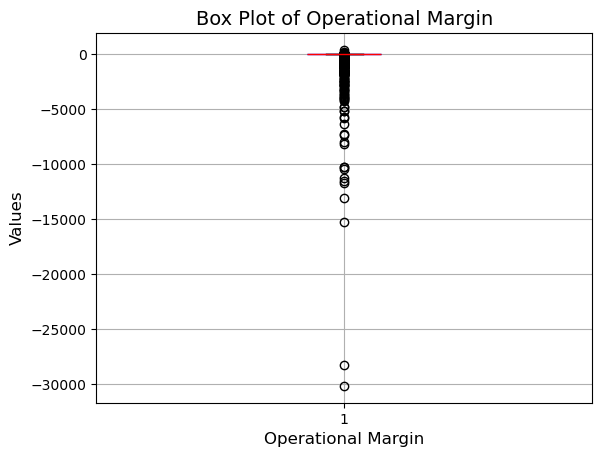

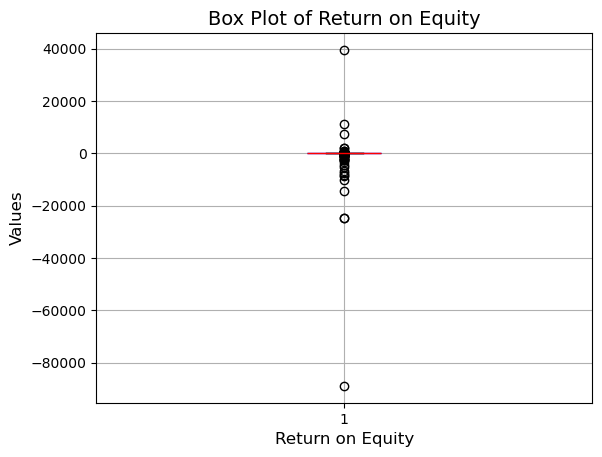

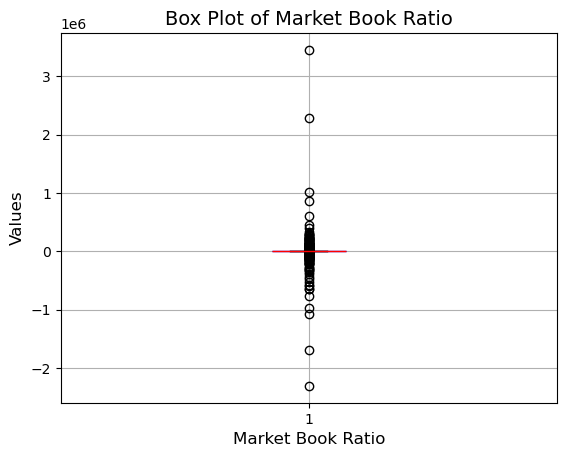

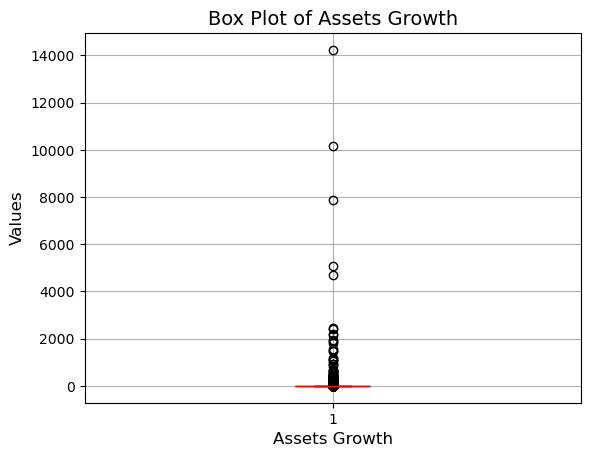

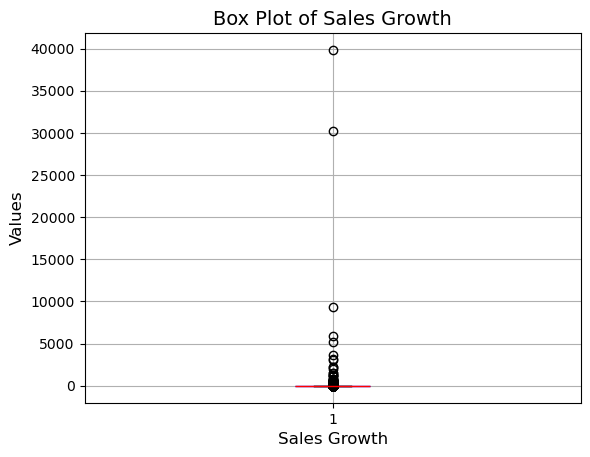

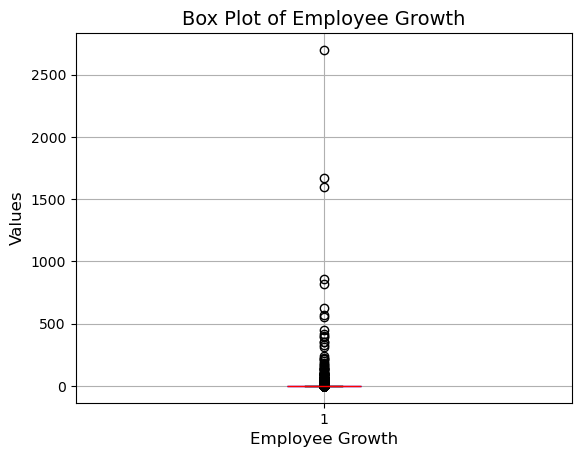

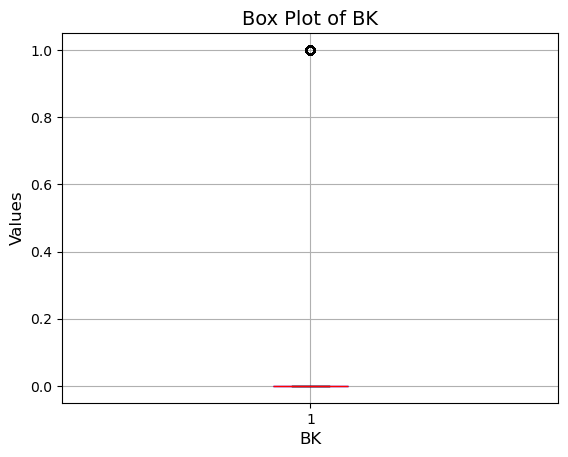

In [114]:
for column in dfBk.columns:
    plt.figure()
    plt.boxplot(dfBk[column].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.grid()
    plt.show()

In [115]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [116]:
X = dfBk.drop('BK',axis=1)
y = dfBk['BK']

In [117]:
X

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030
5,1.500000,0.370000,0.160000,0.110000,0.340000,1.410000,0.080000,0.080000,7.820000,0.132458,0.231681,0.076978
...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824


In [118]:
y

1        0
2        0
3        0
4        0
5        0
        ..
92867    0
92868    0
92869    0
92870    0
92871    1
Name: BK, Length: 85958, dtype: int64

In [119]:
print(X.shape, y.shape)
print(Counter(y))

(85958, 12) (85958,)
Counter({0: 85400, 1: 558})


In [120]:
dfBk.isna().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

#### 1.8 Handling imbalance data using SOMTETomek

In [121]:
smoteTomek = SMOTETomek(random_state=42)
X_smotek, y_smotek = smoteTomek.fit_resample(X, y)

In [123]:
print(X_smotek.shape, y_smotek.shape)
print(Counter(y_smotek))

(170270, 12) (170270,)
Counter({0: 85135, 1: 85135})


### 2. Two methods / Types of models

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_smotek, y_smotek, test_size=0.2, random_state=101)

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.1 SVM

In [128]:
model = SVC()
model.fit(X_train_scaled,y_train)

SVC()

In [129]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [130]:
predictions = model.predict(X_test_scaled)

In [137]:
(accuracy_score(y_test,predictions)*100).round()

68.0

In [132]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69     17044
           1       0.69      0.66      0.68     17010

    accuracy                           0.68     34054
   macro avg       0.68      0.68      0.68     34054
weighted avg       0.68      0.68      0.68     34054



In [138]:
cm = confusion_matrix(y_test,predictions)

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

In [140]:
disp = ConfusionMatrixDisplay(cm)

Text(0.5, 1.0, 'Confusion matrix')

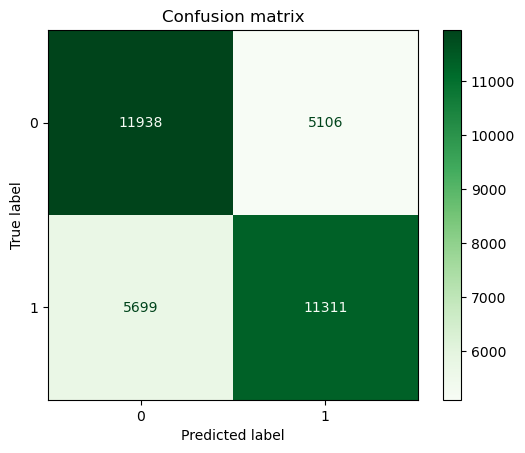

In [141]:
disp.plot(cmap='Greens')
plt.title('Confusion matrix')

#### 2.2 Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
modelRF = RandomForestClassifier()

In [145]:
modelRF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [146]:
predictionsRf = modelRF.predict(X_test_scaled)

In [149]:
print(classification_report(y_test,predictionsRf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     17044
           1       0.98      1.00      0.99     17010

    accuracy                           0.99     34054
   macro avg       0.99      0.99      0.99     34054
weighted avg       0.99      0.99      0.99     34054



In [150]:
(accuracy_score(y_test,predictionsRf)*100).round()

99.0

In [152]:
cmRf = confusion_matrix(y_test,predictionsRf)

In [154]:
dispRf = ConfusionMatrixDisplay(cmRf)

Text(0.5, 1.0, 'Confusion matrix')

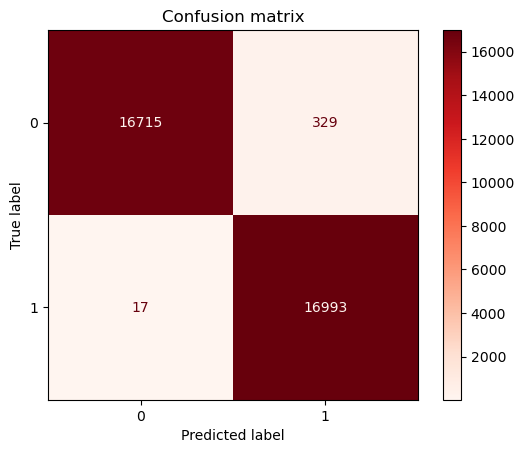

In [155]:
dispRf.plot(cmap='Reds')
plt.title('Confusion matrix')